In [28]:
import tensorflow as tf
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

True

In [29]:
!pip install kaggle

In [30]:
!mkdir ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [31]:
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:09<00:00, 157MB/s]
100% 812M/812M [00:09<00:00, 89.2MB/s]


In [32]:
import zipfile
data = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
data.extractall('/content/')
data.close()

In [33]:
!unzip -qq train.zip
!unzip -qq test1.zip

In [34]:
import os
import shutil

# Specify the paths of the train and test1 folders
train_folder_path = "/content/train"  # Replace with the actual path of your train folder
test1_folder_path = "/content/test1"  # Replace with the actual path of your test1 folder

# Specify the path of the destination folder where you want to merge the images
destination_folder_path = "/content/dog_cat1"

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder_path):
    os.makedirs(destination_folder_path)

# Function to merge images from a source folder to the destination folder
def merge_images(source_folder, destination_folder):
    file_names = os.listdir(source_folder)
    for file_name in file_names:
        source_file_path = os.path.join(source_folder, file_name)
        destination_file_path = os.path.join(destination_folder, file_name)
        shutil.copy(source_file_path, destination_file_path)

# Merge images from the train folder
merge_images(train_folder_path, destination_folder_path)

# Merge images from the test1 folder
merge_images(test1_folder_path, destination_folder_path)

In [35]:
import os, shutil
original_dataset_dir = '/content/train'
base_dir = './dog_cat3/'
os.mkdir(base_dir)
base_dir = './dog_cat3/abc'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

## Importing VGG19 model

In [36]:
from tensorflow.keras.applications import VGG19
conv_base = VGG19(weights = 'imagenet', include_top = False, input_shape =(150, 150, 3))

In [37]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

## Feature Extraction

In [38]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = './dog_cat3/abc'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 21ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 23ms/step


In [39]:
train_features = np.reshape(train_features, (2000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))
val_features = np.reshape(validation_features, (1000, 4*4*512))

## By using Dense layer Classifier

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(256, activation = 'relu', input_dim = (4*4*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(
    train_features,
    train_labels,
    epochs = 30,
    batch_size = 20,
    validation_data = (val_features, validation_labels)
)

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.7541 - accuracy: 0.7250 - val_loss: 0.4914 - val_accuracy: 0.7570
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8205 - val_loss: 0.3442 - val_accuracy: 0.8430
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3490 - accuracy: 0.8485 - val_loss: 0.3778 - val_accuracy: 0.8330
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 0.3154 - accuracy: 0.8720 - val_loss: 0.3087 - val_accuracy: 0.8620
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2881 - accuracy: 0.8810 - val_loss: 0.3496 - val_accuracy: 0.8530
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2583 - accuracy: 0.8980 - val_loss: 0.2814 - val_accuracy: 0.8830
Epoch 7/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2203 - accuracy: 0.9130 - val_loss: 0.2914 - val_accuracy: 0.8910
Epoch 

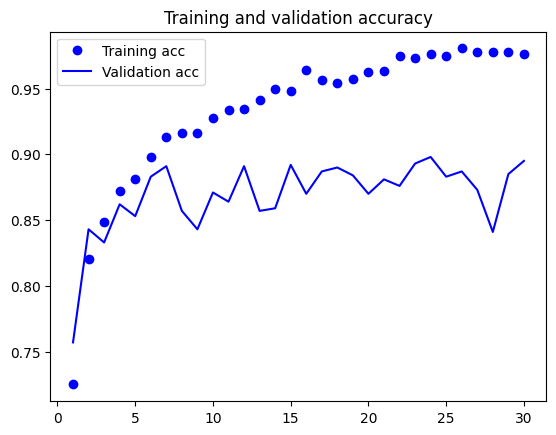

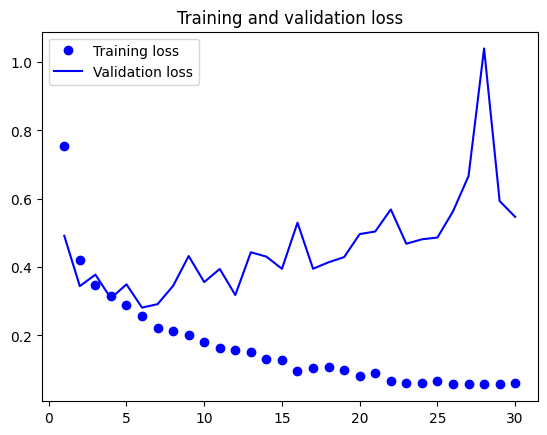

In [41]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [44]:
print(f"trainable weigths before freezing : {len(model.trainable_weights)}")
conv_base.trainable = False
print(f"trainable weigths after freezing : {len(model.trainable_weights)}")

trainable weigths before freezing : 36
trainable weigths after freezing : 4


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1/255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [46]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/30


<ipython-input-46-6aa60cd71618>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


100/100 [==============================] - 24s 226ms/step - loss: 0.8046 - accuracy: 0.6530 - val_loss: 0.3769 - val_accuracy: 0.8340
Epoch 2/30
100/100 [==============================] - 23s 230ms/step - loss: 0.5199 - accuracy: 0.7465 - val_loss: 0.3558 - val_accuracy: 0.8350
Epoch 3/30
100/100 [==============================] - 23s 228ms/step - loss: 0.4749 - accuracy: 0.7685 - val_loss: 0.4863 - val_accuracy: 0.7810
Epoch 4/30
100/100 [==============================] - 23s 228ms/step - loss: 0.4396 - accuracy: 0.7905 - val_loss: 0.3923 - val_accuracy: 0.8190
Epoch 5/30
100/100 [==============================] - 23s 233ms/step - loss: 0.4301 - accuracy: 0.7970 - val_loss: 0.4566 - val_accuracy: 0.8020
Epoch 6/30
100/100 [==============================] - 23s 230ms/step - loss: 0.3956 - accuracy: 0.8105 - val_loss: 0.3879 - val_accuracy: 0.8290
Epoch 7/30
100/100 [==============================] - 23s 229ms/step - loss: 0.3984 - accuracy: 0.8225 - val_loss: 0.2758 - val_accuracy: 0.8

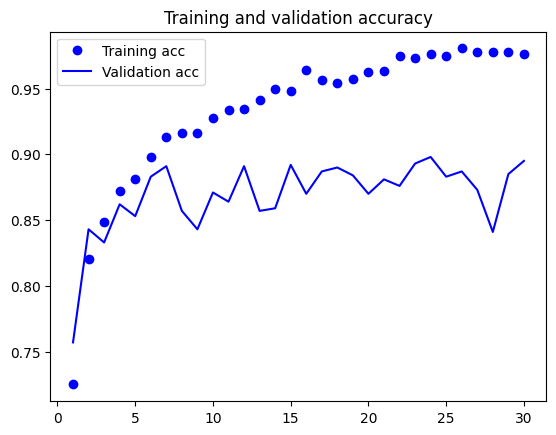

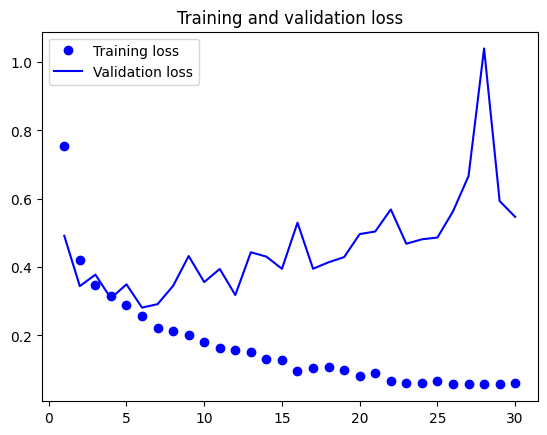

In [47]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [48]:
 conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [49]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_pool':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [50]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

<ipython-input-50-a66af538a7c4>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 24s 223ms/step - loss: 0.3020 - accuracy: 0.8610 - val_loss: 0.2673 - val_accuracy: 0.8770
Epoch 2/100
100/100 [==============================] - 23s 230ms/step - loss: 0.3051 - accuracy: 0.8635 - val_loss: 0.2770 - val_accuracy: 0.8860
Epoch 3/100
100/100 [==============================] - 24s 238ms/step - loss: 0.3028 - accuracy: 0.8665 - val_loss: 0.2831 - val_accuracy: 0.8820
Epoch 4/100
100/100 [==============================] - 24s 234ms/step - loss: 0.2849 - accuracy: 0.8690 - val_loss: 0.2557 - val_accuracy: 0.8870
Epoch 5/100
100/100 [==============================] - 23s 228ms/step - loss: 0.2926 - accuracy: 0.8715 - val_loss: 0.2706 - val_accuracy: 0.8790
Epoch 6/100
100/100 [==============================] - 23s 233ms/step - loss: 0.2914 - accuracy: 0.8735 - val_loss: 0.2848 - val_accuracy: 0.8830
Epoch 7/100
100/100 [==============================] - 23s 226ms/step - loss: 0.2912 - accuracy: 0.8730 - val_loss: 0.2578 -

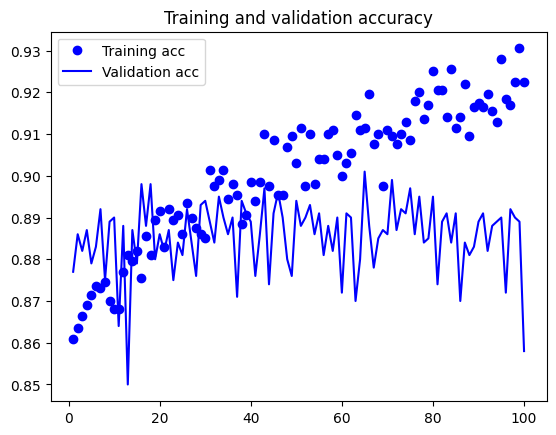

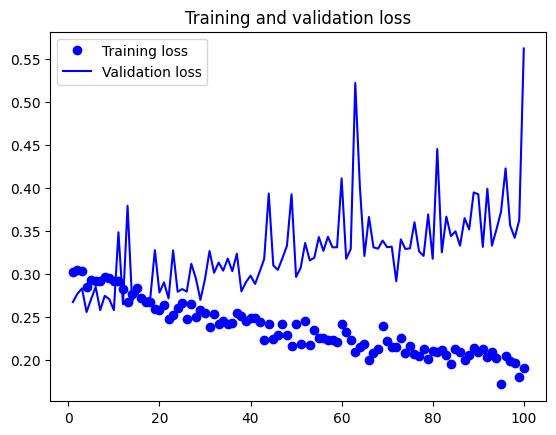

In [51]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

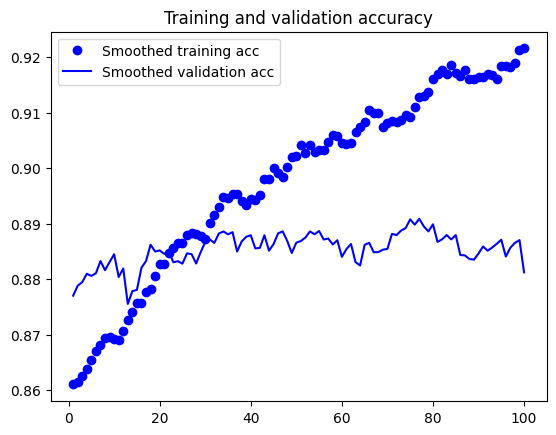

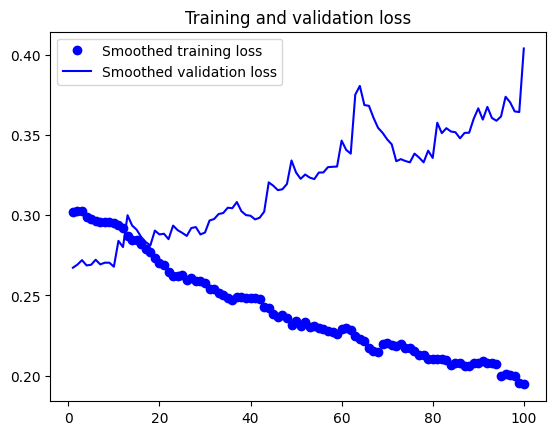

In [52]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
    smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
    smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
    smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
    smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

In [53]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


<ipython-input-53-d4b3f01ce44d>:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)


test acc: 0.843999981880188


In [54]:
tf.keras.models.save_model(model,'my_model2.hdf5')

In [55]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.4 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=246cbb96b9172e9c837c28e111d401010ea786a0e2799eb280c9b315fcb99298
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloc

In [56]:
import streamlit as st
import tensorflow as tf

In [57]:

def loadmodel():
  model = tf.keras.models.load_model('my_model2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=loadmodel()

2023-07-13 18:56:06.596 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


In [64]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from PIL import Image

from PIL import Image
from PIL import ImageOps

def main():
    # Set page title and layout
    st.set_page_config(layout="wide")  # Set layout to "wide"
    st.title("Image Uploader")

    # Create a sidebar for additional controls
    st.sidebar.title("Options")

    # Upload image
    uploaded_image = st.sidebar.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

    # Display uploaded image
    if uploaded_image is not None:
        st.sidebar.image(uploaded_image, caption="Uploaded Image", use_column_width=True)

    # Save image in a variable
    if st.sidebar.button("Save Image"):
        if uploaded_image is not None:
            # Perform any processing on the image here
            # For example, you can save it to a variable
            st.image(uploaded_image, use_column_width=True)
            image = Image.open(uploaded_image)
            image_array = np.array(image.resize((150, 150)))
            image_array = np.reshape(image_array, (1, 150, 150, 3))
            data = ['Cat', 'Dog']
            prediction = model.predict(image_array)
            # Perform your prediction or further processing here
            # For example, you can pass the image_data to a pre-trained model for prediction

            # Display the result
            st.success("Prediction result", data[prediction])

            # Display a success message
            st.sidebar.success("Image saved successfully!")
        else:
            # Display an error message if no image is uploaded
            st.sidebar.error("Please upload an image first.")

if __name__ == "__main__":
    main()


Overwriting app.py
